# Построение графиков для демонстрации реакции курса валют на различные события в мире

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import datetime as dt
%matplotlib inline
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

In [2]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5724 entries, 0 to 5723
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5724 non-null   object 
 1   [Australian dollar ]      5724 non-null   object 
 2   [Bulgarian lev ]          5322 non-null   object 
 3   [Brazilian real ]         5456 non-null   object 
 4   [Canadian dollar ]        5724 non-null   object 
 5   [Swiss franc ]            5724 non-null   object 
 6   [Chinese yuan renminbi ]  5456 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5724 non-null   object 
 9   [Danish krone ]           5724 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5724 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5724 non-null   object 
 14  [Croatia

In [3]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-02-12,1.5666,1.9558,6.5302,1.5418,1.0803,7.8207,NaN,25.753,7.4361,...,4.8746,89.8055,10.0818,1.6066,NaN,NaN,36.2150,8.5010,1.2108,17.7362
1,2021-02-11,1.5638,1.9558,6.4936,1.5384,1.0802,7.8448,NaN,25.772,7.4380,...,4.8745,89.3792,10.0868,1.6080,NaN,NaN,36.2710,8.5254,1.2147,17.7533
2,2021-02-10,1.5682,1.9558,6.5641,1.5394,1.0805,7.8235,NaN,25.835,7.4373,...,4.8752,89.5116,10.0800,1.6080,NaN,NaN,36.2660,8.5503,1.2127,17.8301
3,2021-02-09,1.5681,1.9558,6.5530,1.5414,1.0817,7.7894,NaN,25.738,7.4369,...,4.8753,89.6164,10.1058,1.6074,NaN,NaN,36.2390,8.5883,1.2104,17.8953
4,2021-02-08,1.5693,1.9558,6.4955,1.5363,1.0842,7.7618,NaN,25.739,7.4365,...,4.8748,89.4049,10.1148,1.6067,NaN,NaN,36.0980,8.5308,1.2025,17.9701


In [4]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5719,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5720,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5721,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5722,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5723,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [5]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time',
                              '[Russian rouble ]':'RUB'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', ignore_index=True,
                           inplace=True)
euro_to_dollar = exchange_rates.copy()[["Time",'US_dollar']]

In [6]:
euro_to_dollar["US_dollar"].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.0888     6
          ..
1.3589     1
1.3758     1
1.2941     1
1.1093     1
1.1273     1
Name: US_dollar, Length: 3535, dtype: int64

In [7]:
euro_to_dollar = euro_to_dollar[euro_to_dollar["US_dollar"]!="-"]
euro_to_dollar["US_dollar"]=euro_to_dollar["US_dollar"].astype(float)
euro_to_dollar["US_dollar"].value_counts()

1.2276    9
1.1215    8
1.1305    7
1.1346    6
1.1218    6
         ..
1.1241    1
1.4501    1
1.4845    1
1.0894    1
1.3813    1
Name: US_dollar, Length: 3534, dtype: int64

In [8]:
euro_to_dollar["rolling_mean"] = euro_to_dollar['US_dollar'].rolling(15).mean()

In [9]:
blm = euro_to_dollar[(euro_to_dollar["Time"].dt.year>=2019)&(euro_to_dollar["Time"] < dt.datetime.strptime('2021-1-1', '%Y-%m-%d'))][["Time", "rolling_mean"]].copy()

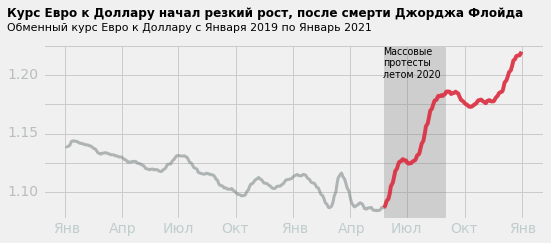

In [10]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(blm["Time"], blm["rolling_mean"], color="#838b8b", linewidth=3, alpha=0.6)
ax.plot(blm[blm["Time"] >= dt.datetime.strptime('2020-05-23', '%Y-%m-%d')]["Time"], blm[blm["Time"] >= dt.datetime.strptime('2020-05-23', '%Y-%m-%d')]["rolling_mean"], color='#E62136', alpha=0.8)
ax.set_xticklabels([])
d = ['Янв', "Апр", "Июл", "Окт",'Янв', "Апр", "Июл", "Окт",'Янв']
dtt = [dt.datetime.strptime('2018-12-12', '%Y-%m-%d'), dt.datetime.strptime('2019-3-12', '%Y-%m-%d'),
      dt.datetime.strptime('2019-6-5', '%Y-%m-%d'), dt.datetime.strptime('2019-9-7', '%Y-%m-%d'),
      dt.datetime.strptime('2019-12-12', '%Y-%m-%d'), dt.datetime.strptime('2020-3-12', '%Y-%m-%d'),
      dt.datetime.strptime('2020-6-5', '%Y-%m-%d'), dt.datetime.strptime('2020-9-8', '%Y-%m-%d'),
      dt.datetime.strptime('2020-12-11', '%Y-%m-%d')]
for x, d in zip(dtt, d):
    ax.text(x, 1.065, d,color='#c1cdcd')
t = ["1.10","1.15","1.20"]
ax.set_yticklabels([])
for y, n in zip ([1.097,1.147,1.197], t):
     ax.text(dt.datetime.strptime('2018-9-30', '%Y-%m-%d'), y, n, color="#838b8b", alpha=0.5)
ax.axvspan(xmin=18407, xmax=18505,alpha=0.3, color='grey', ymin=0.009, ymax=0.98)
ax.text(dt.datetime.strptime('2018-9-30', '%Y-%m-%d'), 1.25, "Курс Евро к Доллару начал резкий рост, после смерти Джорджа Флойда", size=12, weight='bold')
ax.text(dt.datetime.strptime('2018-9-30', '%Y-%m-%d'), 1.238, 'Обменный курс Евро к Доллару с Января 2019 по Январь 2021', size=11)
ax.text(dt.datetime.strptime('2020-5-24', '%Y-%m-%d'), 1.218, "Массовые",size=9.5)
ax.text(dt.datetime.strptime('2020-5-24', '%Y-%m-%d'), 1.208, "протесты",size=9.5)
ax.text(dt.datetime.strptime('2020-5-24', '%Y-%m-%d'), 1.198, "летом 2020",size=9.5)
plt.savefig('Death_of_George_Floyd', bbox_inches = 'tight', dpi=1000)

In [11]:
euro_to_rub = exchange_rates.copy()[['Time','RUB']]
euro_to_rub.value_counts()

Time        RUB    
1999-01-04  25.2875    1
2013-08-08  44.0086    1
2013-09-05  44.1225    1
2013-09-04  44.0000    1
2013-09-03  44.0863    1
                      ..
2006-04-24  33.9400    1
2006-04-21  33.8650    1
2006-04-20  33.9020    1
2006-04-19  33.9110    1
2021-02-12  89.8055    1
Length: 5724, dtype: int64

In [12]:
euro_to_rub = euro_to_rub[euro_to_rub["RUB"]!="-"]
euro_to_rub["RUB"]=euro_to_rub["RUB"].astype(float)
euro_to_rub["rolling_mean"] = euro_to_rub['RUB'].rolling(15).mean()
crimea = euro_to_rub.copy()[(euro_to_rub["Time"].dt.year>2012)&(euro_to_rub["Time"].dt.year<2016)]

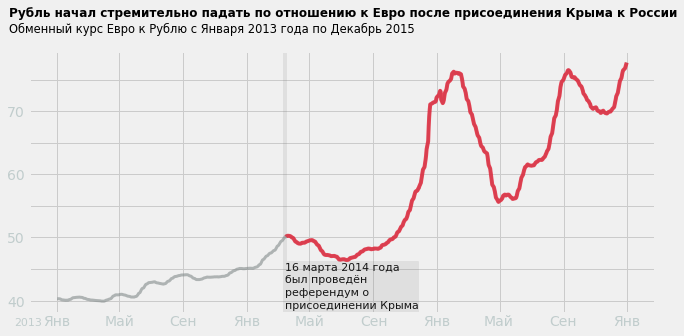

In [13]:
fig, ax = plt.subplots(figsize=(10,4.5))
ax.plot(crimea["Time"], crimea["rolling_mean"],color="#838b8b", linewidth=3, alpha=0.6)
ax.plot(crimea[crimea["Time"]>= dt.datetime.strptime('2014-03-16', '%Y-%m-%d')]["Time"], crimea[crimea["Time"]>= dt.datetime.strptime('2014-03-16', '%Y-%m-%d')]["rolling_mean"], color='#E62136', alpha=0.8)
d = ['Янв', "Май", "Сен", "Янв",'Май', "Сен",'Янв', "Май", "Сен", "Янв"]
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.axvline(x=dt.datetime.strptime('2014-03-16', '%Y-%m-%d'),alpha=0.15, color='grey')
ax.axvspan(xmin=dt.datetime.strptime('2014-03-20', '%Y-%m-%d'), xmax=dt.datetime.strptime('2014-11-25', '%Y-%m-%d'),alpha=0.15, color='grey', ymin=0, ymax=0.20)
ax.text(dt.datetime.strptime('2014-03-16', '%Y-%m-%d'),44.8, "16 марта 2014 года", size=11, alpha=0.9)
ax.text(dt.datetime.strptime('2014-03-16', '%Y-%m-%d'),42.8, "был проведён", size=11, alpha=0.9)
ax.text(dt.datetime.strptime('2014-03-16', '%Y-%m-%d'),40.8, "референдум о", size=11, alpha=0.9)
ax.text(dt.datetime.strptime('2014-03-16', '%Y-%m-%d'),38.8, "присоединении Крыма", size=11, alpha=0.9)
x = [15680,15798,15922,16044,16163,16288,16410,16525,16652,16774]
ax.text(15625,36,2013, color='#c1cdcd', size=11)
c = [40,50,60,70]
y = [39.1,49.2,59.2,69.2]
for y, c in zip(y,c):
    ax.text(15611, y, c,color='#c1cdcd')
for x, m in zip(x,d):
    ax.text(x,36, m,color='#c1cdcd')
ax.text(15615, 85, 'Рубль начал стремительно падать по отношению к Евро после присоединения Крыма к России', weight='bold', size=12)
ax.text(15615, 82.5, 'Обменный курс Евро к Рублю с Января 2013 года по Декабрь 2015', size=11.5)
plt.savefig('Crimea', bbox_inches = 'tight', dpi=1000)

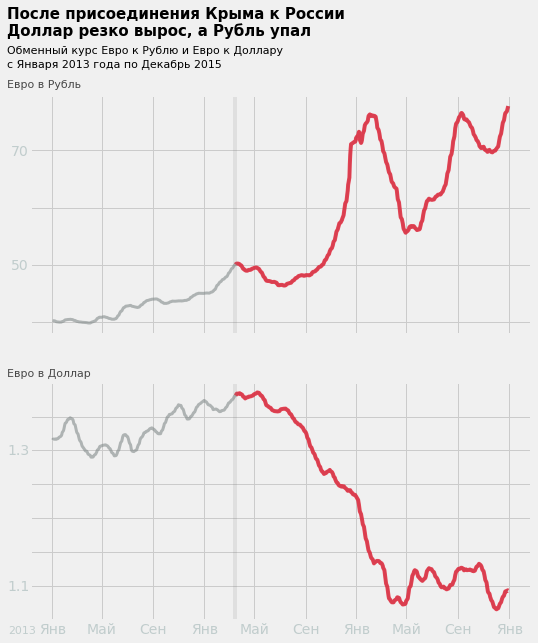

In [14]:
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8,9))

ax1.plot(euro_to_rub[(euro_to_rub['Time'].dt.year>=2013)&(euro_to_rub["Time"].dt.year<2016)]["Time"], euro_to_rub[(euro_to_rub['Time'].dt.year>=2013)&(euro_to_rub["Time"].dt.year<2016)]['rolling_mean'],color="#838b8b", linewidth=3, alpha=0.6)
ax1.plot(euro_to_rub[(euro_to_rub['Time'].dt.year>=2013)&(euro_to_rub["Time"].dt.year<2016)&(euro_to_rub["Time"]>= dt.datetime.strptime('2014-03-16', '%Y-%m-%d'))]["Time"], euro_to_rub[(euro_to_rub['Time'].dt.year>=2013)&(euro_to_rub["Time"].dt.year<2016)&(euro_to_rub["Time"]>= dt.datetime.strptime('2014-03-16', '%Y-%m-%d'))]['rolling_mean'], color='#E62136', alpha=0.8)
ax1.axvline(x=dt.datetime.strptime('2014-03-16', '%Y-%m-%d'),alpha=0.15, color='grey')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
x = [15680,15798,15922,16044,16163,16288,16410,16525,16652,16774]
ax1.text(15608, 49.2, 50,color='#c1cdcd')
ax1.text(15608, 69.2, 70,color='#c1cdcd')
ax1.text(15598, 81, "Евро в Рубль", size=11, alpha=0.7)
ax1.text(15598, 93, "После присоединения Крыма к России", weight='bold', size=15)
ax1.text(15598, 90, "Доллар резко вырос, а Рубль упал", weight='bold', size=15)
ax1.text(15598, 87, 'Обменный курс Евро к Рублю и Евро к Доллару', size=11)
ax1.text(15598, 84.5, 'с Января 2013 года по Декабрь 2015', size=11)



ax2.plot(euro_to_dollar[(euro_to_dollar['Time'].dt.year>=2013)&(euro_to_dollar["Time"].dt.year<2016)]['Time'], euro_to_dollar[(euro_to_dollar['Time'].dt.year>=2013)&(euro_to_dollar["Time"].dt.year<2016)]['rolling_mean'],color="#838b8b", linewidth=3, alpha=0.6)
ax2.plot(euro_to_dollar[(euro_to_dollar['Time'].dt.year>=2013)&(euro_to_dollar["Time"].dt.year<2016)&(euro_to_dollar["Time"]>= dt.datetime.strptime('2014-03-16', '%Y-%m-%d'))]['Time'], euro_to_dollar[(euro_to_dollar['Time'].dt.year>=2013)&(euro_to_dollar["Time"].dt.year<2016)&(euro_to_dollar["Time"]>= dt.datetime.strptime('2014-03-16', '%Y-%m-%d'))]['rolling_mean'], color='#E62136', alpha=0.8)
ax2.axvline(x=dt.datetime.strptime('2014-03-16', '%Y-%m-%d'),alpha=0.15, color='grey')
ax2.set_xticklabels([])
ax2.set_yticklabels([])
x = [15674,15789,15916,16039,16155,16283,16403,16520,16647,16770]
ax2.text(15598, 1.295, 1.30,color='#c1cdcd')
ax2.text(15598, 1.0925, 1.10,color='#c1cdcd')
ax2.text(15600,1.03,2013, color='#c1cdcd', size=11)
ax2.text(15598, 1.41, "Евро в Доллар",size=11, alpha=0.7)
for x, m in zip(x,d):
    ax2.text(x,1.03, m,color='#c1cdcd')
plt.savefig('Crimea_rub_and_doll', bbox_inches = 'tight', dpi=1000)

c:\users\лора\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\users\лора\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator


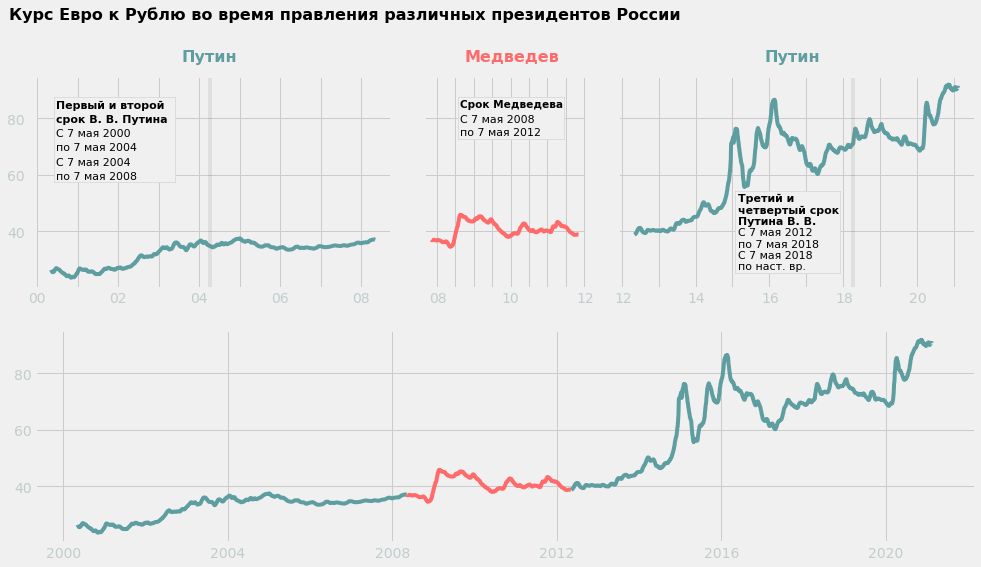

In [15]:
vvp1 = euro_to_rub[(euro_to_rub["Time"] >= dt.datetime.strptime('2000-05-07', '%Y-%m-%d'))&(euro_to_rub["Time"] < dt.datetime.strptime('2008-05-07', '%Y-%m-%d'))]
dam = euro_to_rub[(euro_to_rub["Time"] >= dt.datetime.strptime('2008-05-07', '%Y-%m-%d'))&(euro_to_rub["Time"] < dt.datetime.strptime('2012-05-07', '%Y-%m-%d'))]
vvp2 = euro_to_rub[euro_to_rub["Time"] >= dt.datetime.strptime('2012-05-07', '%Y-%m-%d')]
fig = plt.figure(figsize=(15, 8))
ax1 = plt.subplot2grid((2,5),(0,0), colspan=2)
ax2 = plt.subplot(2,5,3)
ax3 = plt.subplot2grid((2,5),(0,3), colspan=2)
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3]
ax1.plot(vvp1['Time'], vvp1['rolling_mean'], color='#5f9ea0')
ax2.plot(dam['Time'], dam['rolling_mean'], color='#ff6a6a')
ax3.plot(vvp2['Time'], vvp2['rolling_mean'], color='#5f9ea0')
year1 = ['00','02','04','06','08']
year2 = ['08','10','12']
year3 = ['12','14','16','18','20']
for ax in axes:
    ax.set_ylim(20,95)
    
ax1.set_xticklabels([])
ax1.set_yticklabels([])

ax2.set_xticklabels([])
ax2.set_yticklabels([])

ax3.set_xticklabels([])
ax3.set_yticklabels([])

ax4.set_xticklabels([0,2000,2004,2008,2012,2016,2020],color='#c1cdcd')
ax4.set_yticklabels([0,40,60,80],color='#c1cdcd' )

yticknames = [40,60,80]
yticks_p = [38,58,78]
xticks_p = [dt.datetime.strptime('2000-04-07', '%Y-%m-%d'), dt.datetime.strptime('2008-04-07', '%Y-%m-%d'),dt.datetime.strptime('2012-04-07', '%Y-%m-%d')]
pl1 = [10880,11610,12340,13070,13800]
pl2 = [13990,14705,15440]
pl3 = [15265,15995,16725,17455,18185]
for y, c in zip(yticks_p,yticknames):
    ax1.text(dt.datetime.strptime('1999-04-07', '%Y-%m-%d'), y, c,color='#c1cdcd')
for x, y in zip(pl1, year1):
    ax1.text(x, 15, y,color='#c1cdcd')
    
for x, y in zip(pl2, year2):
    ax2.text(x, 15, y,color='#c1cdcd')
    
for x, y in zip(pl3, year3):
    ax3.text(x, 15, y,color='#c1cdcd')

ax1.axvline(dt.datetime.strptime('2004-04-07', '%Y-%m-%d'),alpha=0.15, color='grey')
ax1.axvspan(xmin=dt.datetime.strptime('2000-06-01', '%Y-%m-%d'), xmax=dt.datetime.strptime('2003-06-01', '%Y-%m-%d'), color='#838b8b', ymin=0.5, ymax=0.9)
ax1.axvspan(xmin=dt.datetime.strptime('2000-06-01', '%Y-%m-%d'), xmax=dt.datetime.strptime('2003-06-01', '%Y-%m-%d'), color='#f0f0f0', ymin=0.5, ymax=0.9)

ax1.text(dt.datetime.strptime('2000-06-20', '%Y-%m-%d'), 83.5, 'Первый и второй', size=11,weight='bold')
ax1.text(dt.datetime.strptime('2000-06-20', '%Y-%m-%d'), 78.5, 'срок В. В. Путина', size=11,weight='bold')
ax1.text(dt.datetime.strptime('2000-06-20', '%Y-%m-%d'), 73.5, 'С 7 мая 2000', size=11)
ax1.text(dt.datetime.strptime('2000-06-20', '%Y-%m-%d'), 68.5, 'по 7 мая 2004', size=11)
ax1.text(dt.datetime.strptime('2000-06-20', '%Y-%m-%d'), 63.5, 'С 7 мая 2004', size=11)
ax1.text(dt.datetime.strptime('2000-06-20', '%Y-%m-%d'), 58.5, 'по 7 мая 2008', size=11)

ax2.axvspan(xmin=dt.datetime.strptime('2009-01-28', '%Y-%m-%d'), xmax=dt.datetime.strptime('2011-12-10', '%Y-%m-%d'), color='#838b8b', ymin=0.7, ymax=0.9)
ax2.axvspan(xmin=dt.datetime.strptime('2009-01-28', '%Y-%m-%d'), xmax=dt.datetime.strptime('2011-12-10', '%Y-%m-%d'), color='#f0f0f0', ymin=0.7, ymax=0.9)
ax2.text(dt.datetime.strptime('2009-02-17', '%Y-%m-%d'), 83.9, 'Срок Медведева', size=10.5,weight='bold')
ax2.text(dt.datetime.strptime('2009-02-17', '%Y-%m-%d'), 78.7, 'С 7 мая 2008', size=11)
ax2.text(dt.datetime.strptime('2009-02-17', '%Y-%m-%d'), 74, 'по 7 мая 2012', size=11)

ax3.axvline(dt.datetime.strptime('2018-04-07', '%Y-%m-%d'),alpha=0.15, color='grey')
ax3.axvspan(xmin=dt.datetime.strptime('2015-01-28', '%Y-%m-%d'), xmax=dt.datetime.strptime('2017-12-01', '%Y-%m-%d'), color='#838b8b', ymin=0.068, ymax=0.455)
ax3.axvspan(xmin=dt.datetime.strptime('2015-01-28', '%Y-%m-%d'), xmax=dt.datetime.strptime('2017-12-01', '%Y-%m-%d'), color='#f0f0f0', ymin=0.068, ymax=0.455)
ax3.text(dt.datetime.strptime('2015-02-20', '%Y-%m-%d'), 50.5, 'Третий и', size=11,weight='bold')
ax3.text(dt.datetime.strptime('2015-02-20', '%Y-%m-%d'), 46.5, 'четвертый срок', size=11,weight='bold')
ax3.text(dt.datetime.strptime('2015-02-20', '%Y-%m-%d'), 42.5, 'Путина В. В.', size=11,weight='bold')
ax3.text(dt.datetime.strptime('2015-02-20', '%Y-%m-%d'), 38.5, 'С 7 мая 2012', size=11)
ax3.text(dt.datetime.strptime('2015-02-20', '%Y-%m-%d'), 34.5, 'по 7 мая 2018', size=11)
ax3.text(dt.datetime.strptime('2015-02-20', '%Y-%m-%d'), 30.5, 'С 7 мая 2018', size=11)
ax3.text(dt.datetime.strptime('2015-02-20', '%Y-%m-%d'), 26.5, 'по наст. вр.', size=11)

ax4.plot(vvp1['Time'], vvp1['rolling_mean'], color='#5f9ea0')
ax4.plot(dam['Time'], dam['rolling_mean'], color='#ff6a6a')
ax4.plot(vvp2['Time'], vvp2['rolling_mean'], color='#5f9ea0')

ax1.text(dt.datetime.strptime('2003-07-30', '%Y-%m-%d'), 100, "Путин", size=16, weight='bold', color='#5f9ea0')
ax2.text(dt.datetime.strptime('2009-03-30', '%Y-%m-%d'), 100, "Медведев", size=16, weight='bold', color='#ff6a6a')
ax3.text(dt.datetime.strptime('2015-11-10', '%Y-%m-%d'), 100, "Путин", size=16, weight='bold', color='#5f9ea0')
ax1.text(10700, 115, 'Курс Евро к Рублю во время правления различных президентов России', size=16, weight='bold')
plt.savefig('rus_pres_and_exc_rates', bbox_inches = 'tight', dpi=1000)

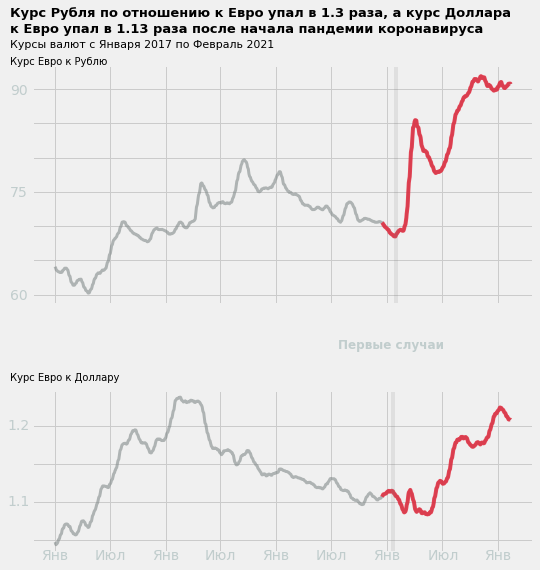

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8,9))
ax1.plot(euro_to_rub[euro_to_rub['Time'].dt.year>2016]["Time"], euro_to_rub[euro_to_rub['Time'].dt.year>2016]["rolling_mean"],color="#838b8b", linewidth=3, alpha=0.6)
ax1.plot(euro_to_rub[euro_to_rub['Time'] >dt.datetime.strptime('2019-12-15', '%Y-%m-%d')]["Time"], euro_to_rub[(euro_to_rub['Time'] >dt.datetime.strptime('2019-12-15', '%Y-%m-%d'))]["rolling_mean"], color='#E62136', alpha=0.8)
ax1.axvline(dt.datetime.strptime('2020-01-31', '%Y-%m-%d'),alpha=0.15, color='grey')
month = ['Янв', "Июл"] * 5
c1=[60,75,90]
placey = [59.2,74.2,89.2]
place = [17122,17298,17489,17660,17852,18028,18217,18395,18582]
for y, c in zip(placey, c1):
    ax1.text(17020, y, c,color='#c1cdcd')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.text(dt.datetime.strptime('2019-07-25', '%Y-%m-%d'), 52, "Первые случаи", size=12, weight='bold',color='#c1cdcd')
ax1.text(17020, 93.5, "Курс Евро к Рублю", size=10)
ax1.text(17020, 100.5,'Курс Рубля по отношению к Евро упал в 1.3 раза, а курс Доллара', weight='bold', size=13) 
ax1.text(17020, 98.25,'к Евро упал в 1.13 раза после начала пандемии коронавируса', weight='bold', size=13)
ax1.text(17020, 96,'Курсы валют с Января 2017 по Февраль 2021', size=11)

ax2.plot(euro_to_dollar[euro_to_dollar['Time'].dt.year>2016]["Time"], euro_to_dollar[euro_to_dollar['Time'].dt.year>2016]["rolling_mean"],color="#838b8b", linewidth=3, alpha=0.6)
ax2.plot(euro_to_dollar[euro_to_dollar['Time'] > dt.datetime.strptime('2019-12-15', '%Y-%m-%d')]["Time"], euro_to_dollar[euro_to_dollar['Time'] > dt.datetime.strptime('2019-12-15', '%Y-%m-%d')]["rolling_mean"], color='#E62136', alpha=0.8)
ax2.axvline(dt.datetime.strptime('2020-01-21', '%Y-%m-%d'),alpha=0.15, color='grey')
ax2.text(17020, 1.26, "Курс Евро к Доллару", size=10)
c2=[1.1,1.2]
placey2 = [1.0955,1.1955]
ax2.set_aspect(aspect=2500)
for y, c in zip(placey2, c2):
    ax2.text(17010, y,c,color='#c1cdcd')
for x, m in zip(place, month):
    ax2.text(x, 1.024, m,color='#c1cdcd')
ax2.set_xticklabels([])
ax2.set_yticklabels([])
plt.savefig('covid19', bbox_inches = 'tight', dpi=1000)